<a href="https://colab.research.google.com/github/olesyamba/Risk_analysis/blob/main/VaR_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
!pip install yfinance
import yfinance as yf

In [ ]:
quotes = yf.download("AAPL", "2016-01-01", "2020-12-31")
returns = quotes['Adj Close'].pct_change().dropna()
returns.head()

[*********************100%***********************]  1 of 1 completed


Date
2016-01-05   -0.025059
2016-01-06   -0.019570
2016-01-07   -0.042205
2016-01-08    0.005288
2016-01-11    0.016192
Name: Adj Close, dtype: float64

In [ ]:
# –≠–º–ø–∏—Ä–∏—á–µ—Å–∫–∞—è –æ—Ü–µ–Ω–∫–∞ VaR

level = 0.99
VaRs = returns.rolling(252, closed="left").apply(lambda x:-x.quantile(1 - level)).dropna()
display(VaRs)
#–¥—Ä–æ–ø –Ω—ç –Ω–∞–¥–æ —á—Ç–æ–±—ã –ø–µ—Ä–≤—ã–µ –Ω—É–ª–µ–≤—ã–µ —É–¥–∞–ª–∏–ª–∏—Å—å, –Ω–∞–º–ø–∞–π –∏ –ø–∞–Ω–¥–∞—Å, —Ä–µ–∞–ª–∏–∑—É—è –º–µ—Ç–æ–¥—ã –ø–æ –æ—Ç–Ω–æ—à–µ–Ω–∏—é –∫ –º–∞—Å—Å–∏–≤—É, –Ω–µ –º–µ–Ω—è—é—Ç –∏—Ö —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å, –ø—Ä–æ—Å—Ç–æ –∑–∞–ø–æ–ª–Ω—è—é—Ç –Ω—ç
#–ø–∞—Ä–º–µ—Ç—Ä–∏—á–µ—Å–∫–∞—è –æ—Ü–µ–Ω–∫–∞ –≤–∞—Ä: —Ö —ç—Ç–æ —Ä–µ—Ç–µ—Ä–Ω—Å, –∞ –∏–º–µ–Ω–Ω–æ –∫—É—Å–æ—á–µ–∫ –≤ 252 –¥–Ω—è, —ç—Ç–æ –Ω–∞–ø–∏—Å–∞–Ω–æ –¥–ª—è –Ω–æ—Ä–º —Ä–∞—Å–ø—Ä, –º–æ–∂–Ω–æ –º–µ–Ω—è—Ç—å –Ω–∞ –ª—é–±–æ–µ

VaRs_param = returns.rolling(252, closed="left").apply(lambda x:- ss.norm.ppf(1 - level, *ss.norm.fit(x))).dropna()
display(VaRs_param)

Date
2017-01-04    0.036269
2017-01-05    0.036269
2017-01-06    0.036269
2017-01-09    0.029306
2017-01-10    0.029306
                ...   
2020-12-23    0.079567
2020-12-24    0.079567
2020-12-28    0.079567
2020-12-29    0.079567
2020-12-30    0.079567
Name: Adj Close, Length: 1005, dtype: float64

Date
2017-01-04    0.033552
2017-01-05    0.033250
2017-01-06    0.033028
2017-01-09    0.032255
2017-01-10    0.032255
                ...   
2020-12-23    0.065223
2020-12-24    0.065269
2020-12-28    0.065276
2020-12-29    0.065301
2020-12-30    0.065417
Name: Adj Close, Length: 1005, dtype: float64

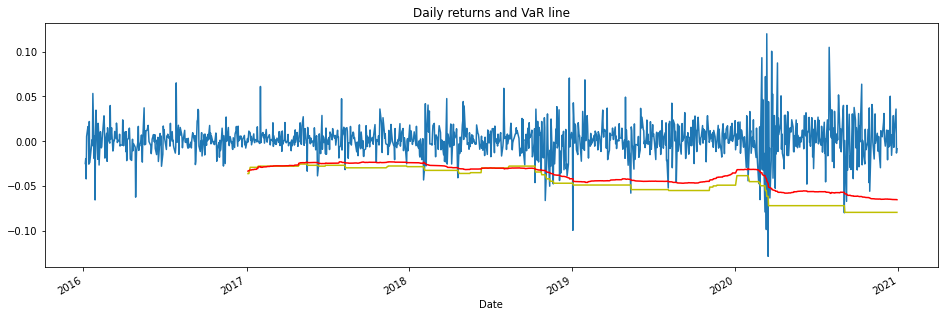

In [ ]:
plt.figure(figsize=(16,5))
returns.plot()
(-VaRs).plot(color='y')
(-VaRs_param).plot(color='r')

plt.title("Daily returns and VaR line");

In [ ]:
VaRs.head()

In [ ]:
#–æ—Ü–µ–Ω–∏–≤–∞–µ–º –ø—Ä–æ–±–∏—Ç–∏—è
hits = returns[VaRs.index] < -VaRs
hits
#false —ç—Ç–æ –∫–æ–≥–¥–∞ –Ω–µ—Ç –ø—Ä–æ–±–∏—Ç–∏—è

Date
2017-01-04    False
2017-01-05    False
2017-01-06    False
2017-01-09    False
2017-01-10    False
              ...  
2020-12-23    False
2020-12-24    False
2020-12-28    False
2020-12-29    False
2020-12-30    False
Name: Adj Close, Length: 1005, dtype: bool

In [ ]:
hit_times = hits.index[hits]
hit_times

DatetimeIndex(['2017-05-17', '2017-06-09', '2017-08-10', '2018-02-02',
               '2018-04-20', '2018-10-10', '2018-11-02', '2018-11-12',
               '2018-11-20', '2019-01-03', '2019-05-13', '2020-01-31',
               '2020-02-24', '2020-02-27', '2020-03-09', '2020-03-12',
               '2020-03-16', '2020-09-03'],
              dtype='datetime64[ns]', name='Date', freq=None)

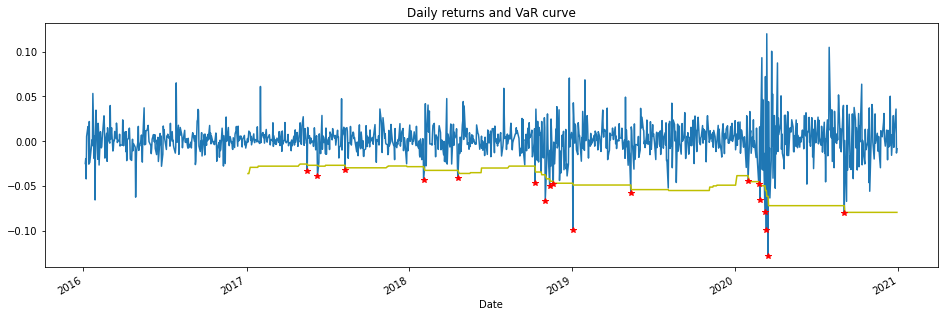

In [ ]:
plt.figure(figsize=(16,5))
returns.plot()
(-VaRs).plot(color='y')
plt.plot(hit_times, returns[hit_times], 'r*')

plt.title("Daily returns and VaR curve");

In [ ]:
N = hits.size
n = hits.sum()
N, n # N - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π, n - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–æ–µ–≤ VaR

(1005, 18)

In [ ]:
# Hit fraction (expected 0.01). –í–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–æ–±–æ—è = 1% (1 - level)
n / N * 100
# –ø–æ —Å—É—Ç–∏ 1,79 –±–æ–ª—å—à–µ 1 —É—Ä–æ–≤–Ω—è –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏, –Ω–æ —Ç–∞–∫ —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –Ω–µ–ª—å–∑—è, –Ω–∞–¥–æ –¥–µ–ª–∞—Ç—å
# –±—ç–∫—Ç–µ—Å—Ç, –ø–æ—Ç–æ–º—É —á—Ç–æ –≤–∞—Ä 99 —ç—Ç–æ —Ç–µ–æ—Ä –º–æ–¥–µ–ª—å, –∞ –º—ã —Å—á–∏—Ç–∞–µ–º –Ω–∞ —ç–º–ø–∏—Ä–∏—á–µ—Å–∫–∏—Ö –¥–∞–Ω–Ω—ã—Ö

1.791044776119403

#–ë—ç–∫—Å—Ç–µ—Å—Ç–∏–≥

–ò—Å–ø–æ–ª—å–∑—É–µ–º –±–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π —Ç–µ—Å—Ç –Ω–∞ –ø–æ–∫—Ä—ã—Ç–∏–µ

H0:  ùëõ‚àºùêµ(ùëÅ,ùëû),ùëû=1‚àíùëôùëíùë£ùëíùëô

In [ ]:
# –ê –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–æ–±–æ—è = 1%? –¥–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –±–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π —Ç–µ—Å—Ç
p_val = ss.binom_test(n, N, 1-level, alternative="two-sided")
p_val * 100
# –∏–¥–µ—è —Ç–µ—Å—Ç–µ: —Å—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å–æ —Å—Ä–µ–¥–Ω–∏–º –æ–∂–∏–¥–∞–µ–º—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –ø—Ä–æ–±–æ–µ–≤ (–≤–∞—Ä), —Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ–±–æ–µ–≤ –≤–ø—Ä–∞–≤–æ –∏ –≤–ª–µ–≤–æ –æ—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ

2.4177619417213485

In [ ]:
# –ê –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –ø—Ä–æ–±–æ—è <= 1%? –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π –±–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–π —Ç–µ—Å—Ç
p_val = ss.binom_test(n, N, 1-level, alternative="greater")
p_val * 100

1.4469466935299535

–ö–∞–∫ –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –ø–æ–ª—É—á–µ–Ω–Ω—ã–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –æ—Å–Ω–æ–≤–µ p-value?

In [ ]:
# –ü—Ä–∞–≤–∏–ª–æ —Å—Ñ–µ—Ç–æ—Ñ–æ—Ä–∞, trafic light room, –µ—Å–ª–∏ –ø–∏–≤—ç–ª—å—é –±—É–¥–µ—Ç –±–æ–ª—å—à–µ 5 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤,
# –ø—Ä–∏ —É—Ä–æ–≤–Ω–µ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ 95 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤, –º—ã –Ω–µ –º–æ–∂–µ–º –æ—Ç–≤–µ—Ä–≥–Ω—É—Ç—å –≥–∏–ø–æ—Ç–µ–∑—É –Ω—É–ª–µ–≤—É—é,
# –º–æ–¥–µ–ª—å –ø—Ä–∏–∑–Ω–∞–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π  - –∑–µ–ª–µ–Ω—ã–π

# –µ—Å–ª–∏ –ø–∏–≤—ç–ª—å—é –º–µ–Ω—å—à–µ 5 –ø—Ä–æ—Ü–µ–Ω—Ç–æ–≤ –Ω–æ –Ω–µ —Å–∏–ª—å–Ω–æ, –ø—Ä–æ–±–æ–µ–≤ –±–æ–ª—å—à–µ —á–µ–º –∫—Ä–∏—Ç–∏—á–µ—Å–∫–æ–µ
# –∑–Ω–∞—á–µ–Ω–∏–µ, –Ω–æ –Ω–µ —Å–∏–ª—å–Ω–æ, –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å, –æ–Ω–∞ –æ—à–∏–±–æ—á–Ω–æ –æ–µ–Ω–µ–Ω–∞ –∫–∞–∫
# –ø–ª–æ—Ö–∞—è, –≤–æ–∑–º–æ–∂–Ω–æ –≤–∞—Ä —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∏–π, —Ü–≤–µ—Ç –∂–µ–ª—Ç—ã–π

#–µ—Å–ª–∏ –ø–∏–≤—ç–ª—å—é —Å—É–ø–µ—Ä–º–∞–ª–µ–Ω—å–∫–æ–µ - –≤ —Ç–æ–ø–∫—É —ç—Ç—É –º–æ–¥–µ–ª—å - —Ü–≤–µ—Ç –∫—Ä–∞—Å–Ω—ã–π
def zone(p):
  if p > 0.05:
    return "green"
  elif p > 0.0001:
    return "yellow"
  else:
    return "red"

In [ ]:
zone(p_val)

'yellow'

### –ö–∞–∫–æ–π —Ç–µ—Å—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å? –û–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω—ã–º –∏–ª–∏ –¥–≤—É—Å—Ç–æ—Ä–æ–Ω–Ω–æ–Ω–Ω–∏–º?

–†–µ–≥—É–ª–∏—Ä–æ–≤–∞–Ω–∏–µ? = –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω—ã–π —Ç–µ—Å—Ç —Å –ø–æ—Ä–æ–≥–æ–≤—ã–º –∑–Ω–∞—á–µ–Ω–∏–µ–º "–Ω–µ —Ö—É–∂–µ, —á–µ–º 99.."

–í–Ω—É—Ç—Ä–µ–Ω–Ω—è—è —Ä–∞–∑—Ä–∞–±–æ—Ç–∫–∞ –∏–ª–∏ —Ç–µ—Å—Ç –∫—É–ø–ª–µ–Ω–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã? = –æ–¥–Ω–æ—Å—Ç–æ—Ä–æ–Ω–Ω–∏–π —Ç–µ—Å—Ç

–ï—Å–ª–∏ –Ω–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ –ø—Ä–æ–±–æ–∏ - —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–±–∏–Ω–æ–º–∏–∞–ª—å–Ω—ã–º, —Å —Ç—è–∂–µ–ª—ã–º–∏ —Ö–≤–æ—Å—Ç–∞–º–∏ –∏ —Ç–µ—Å—Ç—ã –±—É–¥—É—Ç —Ä–∞–±–æ—Ç–∞—Ç—å –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ. –ü–æ—ç—Ç–æ–º—É –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å.


–¢–µ—Å—Ç –Ω–∞ –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å: $P(Hit_{t+1}\,|\,Hit_t) \overset{?}{=} P(Hit_{t+1}\,|\, \overline{Hit_t})$

In [ ]:
hits_yeasterday = hits.shift(1).dropna().astype(bool)
hits_today = hits[hits_yeasterday.index]
n_hits_today_given_no_hit_yeasterday = (hits_today & ~(hits_yeasterday)).sum()
n_hits_today_given_hit_yeasterday = (hits_today & hits_yeasterday).sum()
print(n_hits_today_given_no_hit_yeasterday, n_hits_today_given_hit_yeasterday)

18 0


–ü—Ä–æ–±–æ–∏ —Å–ª–µ–¥—É—é—Ç –∑–∞ —Å–ø–æ–∫–æ–π–Ω—ã–º–∏ –¥–Ω—è–º–∏, –ù–µ –ø–æ–≤–µ–∑–ª–æ! –ù–µ—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–∑ –ø—Ä–æ–±–æ–µ–≤!

–ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π —Ç–µ—Å—Ç: –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –ø—Ä–æ–±–∏—Ç–∏—è–º–∏ VaR - –µ—Å–ª–∏ –Ω—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ –≤–µ—Ä–Ω–∞, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å —ç–∫—Å–ø–æ–Ω–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–º (–∑–¥–µ—Å—å –Ω–µ—Å—Ç—Ä–æ–≥–∏–π —Ç–µ—Å—Ç;  `Christoffersen, Pelltier (2004)` - —Å—Ç—Ä–æ–≥–∏–π —Ç–µ—Å—Ç).

In [ ]:
hit_deltas = np.diff(np.hstack([VaRs.index[[0]].values, hit_times.values])) / np.timedelta64(1, 'D')

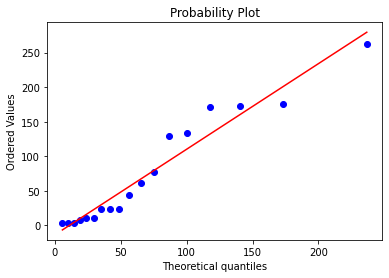

In [ ]:
params = ss.expon.fit(hit_deltas)
ss.probplot(hit_deltas, dist=ss.expon(*params), plot=plt);
# –µ—Å–ª–∏ –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –º—ã –¥–æ–ª–∂–Ω—ã —É–≤–∏–¥–µ—Ç—å —Å–∏–Ω–∏–µ —Ç–æ—á–∫–∏ –Ω–∞ –∫—Ä–∞—Å–Ω–æ–π –ª–∏–Ω–∏–∏, –µ—Å–ª–∏ –µ—Å—Ç—å –≤–æ–ª–Ω—ã –∏ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è, —Å–∫–æ—Ä–µ–µ –≤—Å–µ–≥–æ –Ω–∞–±–ª—é–¥–µ–Ω–∏—è –Ω–µ –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã–µ

–°—É–ø–µ—Ä –≤–∞–∂–Ω—ã–π —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏–π –º–æ–º–µ–Ω—Ç –ø—Ä–∏ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –±—ç–∫—Ç–µ—Å—Ç–∞.

–ü—Ä–æ–ø—É—Å–∫–∏ –¥–∞–Ω–Ω—ã—Ö (P&L –∏–ª–∏ VaR)

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
losses = [10, 11, 12, 11, 10, 9, 11, 13, 11, 9, 8, 9]
VaRs_3m_ahead = [9.5, 9, 8.5, 9, 9.5, 10.5, 9, 10, 11, 12, 11, 10]

df = pd.DataFrame({"Month": months, "Losses": losses, "VaR": VaRs_3m_ahead})
df = df.set_index("Month")
#print(df.to_string(index=False))
df

Losses   VaR
Month              
Jan        10   9.5
Feb        11   9.0
Mar        12   8.5
Apr        11   9.0
May        10   9.5
Jun         9  10.5
Jul        11   9.0
Aug        13  10.0
Sep        11  11.0
Oct         9  12.0
Nov         8  11.0
Dec         9  10.0

In [ ]:
pd.concat([df['Losses'], df['VaR'].shift(1)], axis=1)

Losses   VaR
Month              
Jan        10   NaN
Feb        11   9.5
Mar        12   9.0
Apr        11   8.5
May        10   9.0
Jun         9   9.5
Jul        11  10.5
Aug        13   9.0
Sep        11  10.0
Oct         9  11.0
Nov         8  12.0
Dec         9  11.0

In [ ]:
hits = df['Losses'] > df['VaR'].shift(1)
# this is bad... We don't have an observation for Jan!!!
hits

Month
Jan    False
Feb     True
Mar     True
Apr     True
May     True
Jun    False
Jul     True
Aug     True
Sep     True
Oct    False
Nov    False
Dec    False
dtype: bool

In [ ]:
n = hits.sum()
N = hits.size
N, n

(12, 7)

In [ ]:
df['VaR'] = df['VaR'].shift(1)
df.dropna(inplace=True)
hits = df['Losses'] > df['VaR']
n = hits.sum()
N = hits.size
N, n

(11, 7)